# Марковские модель эпидемии #
Работа выполнена студентом группы 23КНТ2 ИМИКН ВШЭ НН ***Власовым Артёмом Дмитриевичем***

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

np.random.seed(seed=42)

In [42]:
df = pd.read_excel('Великобритания.xlsx', sheet_name='Sheet1')
df.head()

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день
0,Великобритания,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,8256935,121693
1,Великобритания,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,8388397,131462
2,Великобритания,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,8522679,134282
3,Великобритания,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,8663993,141314
4,Великобритания,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,8798036,134043


In [43]:
df.tail()

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день
604,Великобритания,16.03.2022,20059641,NaN,163833,93943,NaN,153,63181775,476632060,853716
605,Великобритания,17.03.2022,20150847,NaN,163972,91206,NaN,139,63181775,477378853,746793
606,Великобритания,18.03.2022,20243940,NaN,164099,93093,NaN,127,63181775,477950504,571651
607,Великобритания,19.03.2022,20243940,NaN,164099,0,NaN,0,63181775,478578610,628106
608,Великобритания,20.03.2022,20243940,NaN,164099,0,NaN,0,63181775,0,0


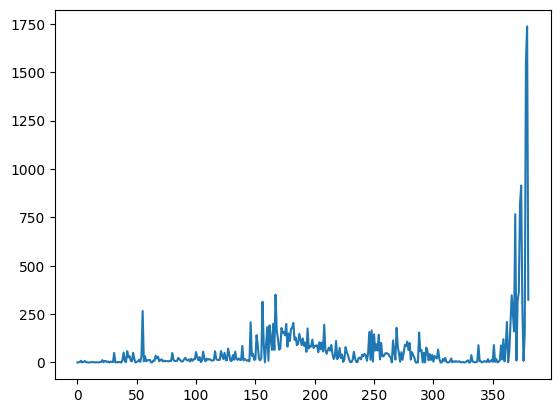

In [44]:
plt.plot(df.index, df['Выздоровлений за день'])
plt.show()

# Работаем с пропущенными значениями c использованием алгоритмов машинного обучения

Как мы видим, начиная с 381 строки в столбцах **'Выздоровлений за день'** и **'Выздоровлений'** вместо данных идут пропуски. Используем Random Forest Regressor, чтобы обучить на первых 300+ строках, а затем предсказать недостающие значения.

Перейдём к следующим шагам:

1. Построим модель случайного леса по непустым данным.

2. Применим её к строкам с пропущенными значениями.

3. Заполним пропуски предсказаниями модели.

In [45]:
from sklearn.ensemble import RandomForestRegressor

def fill_daily_recovered(df):
    """
    Заполнение ежедневных выздоровлений через регрессию
    """

    df['Индекс_дня'] = df.index

    known = df[df['Выздоровлений за день'].notna()]

    X = known[['Индекс_дня', 'Тестов за день']].values
    y = known['Выздоровлений за день'].values

    # Обучаем модель
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    all_X = df[['Индекс_дня', 'Тестов за день']].values
    predicted = model.predict(all_X)

    filled = df['Выздоровлений за день'].where(
        df['Выздоровлений за день'].notna(),
        np.round(predicted).clip(min=0)
    )
    return filled.astype(int)

Заполняем пропуски

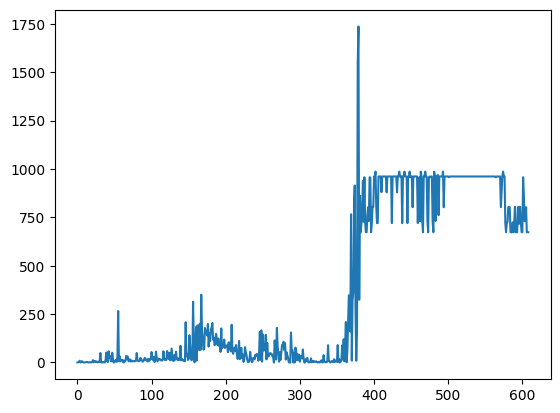

In [46]:
df['Выздоровлений за день'] = fill_daily_recovered(df)

plt.plot(df.index, df['Выздоровлений за день'])
plt.show()

Вычисляем значения для столбца 'Выздоровлений' начиная с 381 строки, поскольку там тоже пропуски, но зная изначальное выздоровлений и все данные о выздоровлениях в день мы можем всё вычислить

In [47]:
start_index = 381

for i in range(start_index, len(df)):
    df.loc[i, 'Выздоровлений'] = df.loc[i-1, 'Выздоровлений'] + df.loc[i, 'Выздоровлений за день']

In [48]:
# Проверяем, нет ли пустых значений
df[df["Выздоровлений"].isnull()]

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день,Индекс_дня


Удаляем столбец **'Страна'**, **'Тестов'**, **'Тестов за день''**, **'Смертей за день'** и **'index'** поскольку они не несут никакой полезной информации для следующих заданий

In [49]:
df.drop(columns=['Страна'], inplace=True)
df.drop(columns=['Тестов'], inplace=True)
df.drop(columns=['Тестов за день'], inplace=True)
df.drop(columns=['Индекс_дня'], inplace=True)
df.head()

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны
0,20.07.2020,296940,1413.0,41090,586,0,10,63181775
1,21.07.2020,297385,1414.0,41115,445,1,25,63181775
2,22.07.2020,297948,1416.0,41132,563,2,17,63181775
3,23.07.2020,298727,1425.0,41141,779,9,9,63181775
4,24.07.2020,299495,1425.0,41173,768,0,32,63181775


### 1. Ввести начальное состояние процесса как пару (𝑖,𝑗), где 𝑖 – количество больных (инфицированных), 𝑗 – количество восприимчивых на момент начала наблюдений

In [50]:
# Параметры
BETA = 0.0067
GAMMA = 0.0001
POPULATION = df['Население страны'].iloc[0]
PER_100K = 100000
SCALE = PER_100K / POPULATION  # Масштабирование на 100 тыс.

In [51]:
# Начальные условия 
I = int((df['Заражений'].iloc[0] - df['Выздоровлений'].iloc[0] - df['Смертей'].iloc[0]) * SCALE) 
R = int((df['Выздоровлений'].iloc[0] + df['Смертей'].iloc[0]) * SCALE) 
J =  PER_100K - I - R
print(f"Начальное состояние: инфицированных = {I}, восприимчивых = {J}")

Начальное состояние: инфицированных = 402, восприимчивых = 99531


### 2. Вычислить для этого состояния интенсивности перехода и выхода (инфинитезимальные характеристики)

$$
a_{(i,j) \to (i+1, j-1)} = i \beta \frac{j}{N}
$$

$$
a_{(i,j) \to (i-1, j)} = i \gamma
$$

$$
a_{(i,j)} = i \beta \frac{j}{N} + i \gamma
$$

---

In [52]:
def compute_intensities(i, j, beta, gamma):
    """
    Вычисление интенсивностей заражения и выздоровления
    :param i: Число зараженных
    :param j: Число восприимчивых
    :param beta: Параметр заражения
    :param gamma: Параметр выздоровления
    :return: lambda_infect, lambda_recover, lambda_total
    """

    lambda_infect = beta * i * j / PER_100K  # Интенсивность заражения
    lambda_recover = gamma * i               # Интенсивность выздоровления
    lambda_total = lambda_infect + lambda_recover  # Интенсивность выхода
    return lambda_infect, lambda_recover, lambda_total


In [53]:
lambda_infect, lambda_recover, lambda_total = compute_intensities(I, J, BETA, GAMMA)

print(f"Интенсивность заражения: {lambda_infect:.5f}")
print(f"Интенсивность выздоровления: {lambda_recover:.5f}")
print(f"Суммарная интенсивность выхода: {lambda_total:.5f}")

Интенсивность заражения: 2.68077
Интенсивность выздоровления: 0.04020
Суммарная интенсивность выхода: 2.72097


### 3. На основе полученных значений интенсивностей смоделировать следующее состояние и время пребывания в текущем состоянии.

**Вероятность заражения (увеличение числа инфицированных на 1):**
$$
P_{(i,j) \to (i+1,j-1)} = \frac{i \beta \frac{j}{N}}{i \beta \frac{j}{N} + i \gamma} = \frac{\beta \frac{j}{N}}{\beta \frac{j}{N} + \gamma} = \frac{\lambda_{Infect}}{\lambda_{Total}} 
$$

**Вероятность выздоровления (уменьшение числа инфицированных на 1):**
$$
P_{(i,j) \to (i-1,j)} = \frac{i \gamma}{i \beta \frac{j}{N} + i \gamma} = \frac{\gamma}{\beta \frac{j}{N} + \gamma} = \frac{\lambda_{Recover}}{\lambda_{Total}} 
$$

---

In [54]:
def next_event(i, j, beta, gamma):
    """
    Вычисление времени до следующего события и обновление состояния системы
    :param i: Число зараженных
    :param j: Число восприимчивых
    :param beta: Параметр заражения
    :param gamma: Параметр выздоровления
    :return: Время до следующего события, новое число зараженных и восприимчивых
    """
    lambda_infect, lambda_recover, lambda_total = compute_intensities(i, j, beta, gamma)
    
    if lambda_total == 0:
        return np.inf, i, j  # Больше переходов нет

    dt = np.random.exponential(1 / lambda_total)  # Время до следующего события
    
    # Выбор типа события
    # С вероятностью lambda_infect / lambda_total происходит заражение, иначе выздоровление
    event = np.random.choice(['infect', 'recover'], p=[lambda_infect / lambda_total, lambda_recover / lambda_total])
    
    if event == 'infect' and j > 0:
        i += 1
        j -= 1
    elif event == 'recover' and i > 0:
        i -= 1
    
    return dt, i, j

In [55]:
dt, next_i, next_j = next_event(I, J, BETA, GAMMA)

print(f"Следующее событие через {dt:.4f} дня")
print(f"Новое состояние: инфицированных = {next_i}, восприимчивых = {next_j}")

Следующее событие через 0.1725 дня
Новое состояние: инфицированных = 403, восприимчивых = 99530


### 4. Повторять пункты 2,3 для следующих состояний до тех пор, пока текущее время не превысит период наблюдений.

In [56]:
def simulate_trajectory(beta, gamma, initial_i, initial_j, max_days):
    """
    Симуляция траектории эпидемии
    :param beta: Параметр заражения
    :param gamma: Параметр выздоровления
    :param initial_i: Начальное число зараженных
    :param initial_j: Начальное число восприимчивых
    :param max_days: Максимальное количество дней для симуляции
    :return: Время, число зараженных и восприимчивых на каждом шаге
    """
    t = 0.0
    times = [t]
    infected = [initial_i]
    susceptible = [initial_j]
    
    i, j = initial_i, initial_j
    
    while t < max_days:
        dt, i, j = next_event(i, j, beta, gamma)
        if dt == np.inf:
            break  # Нет больше событий :(
        
        t += dt
        times.append(t)
        infected.append(i)
        susceptible.append(j)
    
    return times, infected, susceptible

In [57]:
# Моделирование 3 траекторий
trajectories = []

for _ in range(3):
    times, infected, susceptible = simulate_trajectory(BETA, GAMMA, I, J, len(df))
    trajectories.append((times, infected, susceptible))

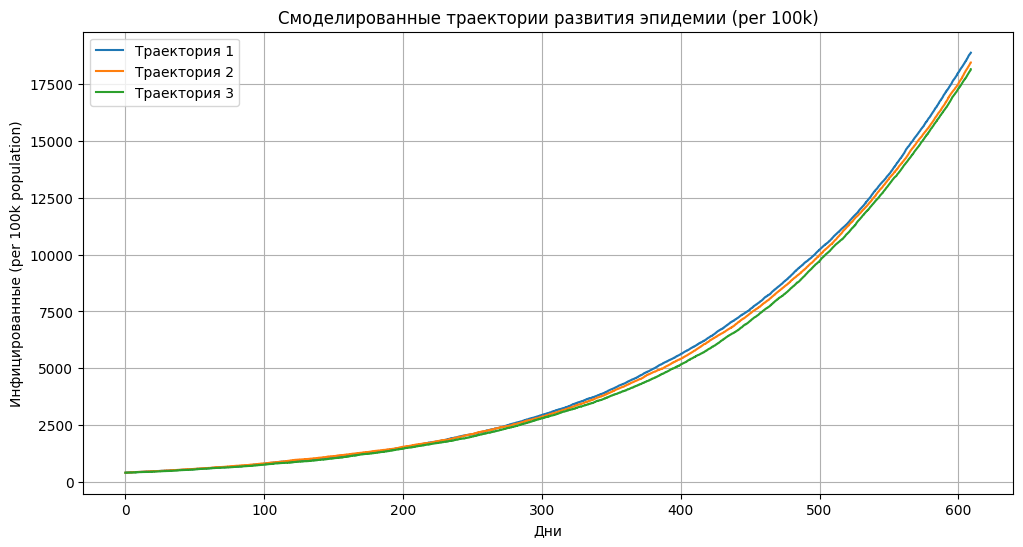

In [58]:
# Визуализация результатов
plt.figure(figsize=(12, 6))

for idx, (times, infected, _) in enumerate(trajectories):
    plt.step(times, infected, where='post', label=f'Траектория {idx + 1}')

plt.xlabel('Дни')
plt.ylabel('Инфицированные (per 100k population)')
plt.title('Смоделированные траектории развития эпидемии (per 100k)')
plt.legend()
plt.grid(True)
plt.show()


Как мы можем заметить, что траектории 1, 2 и 3 имеют разные значения, но в целом они имеют одинаковую форму, причём первая и третья траектории практически идентичны, с небольшим различием по нескольким дня.

### 5. Построить графики зависимости расчетного количества больных (первой компоненты траектории случайного процесса) от времени (3 графика). Для сравнения на той же диаграмме построить график для реальных (нормированных) данных 

In [59]:
df['I'] = df['Заражений'] - df['Выздоровлений'] - df['Смертей']
real_infected = (df['I']  * SCALE).values # нормируем на 100 тыс. населения
real_days = np.arange(len(real_infected))

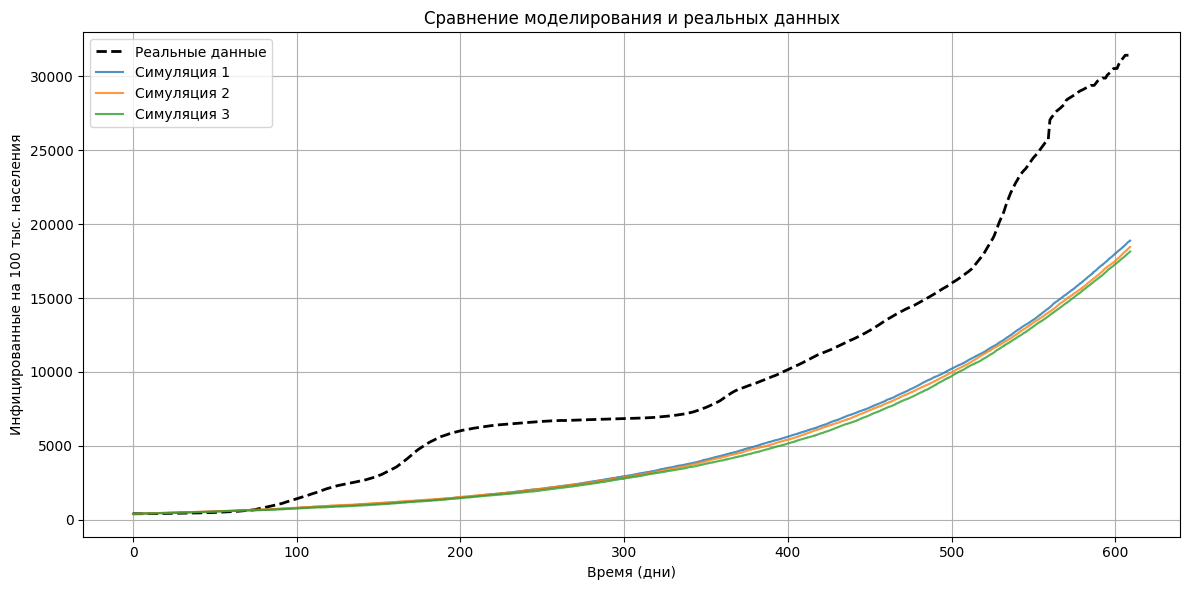

In [60]:
plt.figure(figsize=(12, 6))

# Визуализация результатов с реальными данными
plt.plot(real_days, real_infected, label='Реальные данные', color='black', linewidth=2, linestyle='--')

# 3 траектории
for idx, (times, infected, _) in enumerate(trajectories):
    plt.step(times, infected, where='post', label=f'Симуляция {idx + 1}', alpha=0.8)

plt.xlabel('Время (дни)')
plt.ylabel('Инфицированные на 100 тыс. населения')
plt.title('Сравнение моделирования и реальных данных')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
